In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [2]:
plt.rcParams['font.family'] = 'sans-serif'  # Change to your desired font
plt.rcParams['font.size'] = 11              # Change to your desired fontsize
plt.rcParams['figure.dpi'] = 100            # Change to your desired image resolution

In [ ]:
# reading dataset 

df = pd.read_excel("train_dataset.xlsx ", sheet_name = 'train_set') # copy and paste source data path
df.head()


In [ ]:
# observing correlation between variables

df.corr()

In [ ]:
## fit a OLS model with intercept on Vp and Vlat

X, y = df[['Vlat']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
## fit a OLS model with intercept on Vp and Vfrt 

X, y = df[['Vfrt']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
# fit a OLS model with intercept on Vp and angular width

X, y = df[['2aw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
## fit a OLS model with intercept on Vp and Vsw

X, y = df[['Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
# multiple regression analysis for lateral_exp, front_exp and propagation speed

X, y = df[['Vlat', 'Vfrt']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

In [ ]:
# multiple regression analysis for front_exp, angular width, and propagation speed

X, y = df[['Vfrt', '2aw']], df['Vp']

## fit a OLS model with intercept on Vlat and Vfrt 
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()





In [ ]:
# multiple regression analysis for front_exp, solar_wind and propagation speed

X, y = df[['Vfrt', 'Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
# multiple regression analysis for  front, lateral, angular width and propagation speed

X, y = df[['Vfrt', 'Vlat', '2aw' ]], df['Vt']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

In [ ]:
# multiple regression analysis for front, lateral, solar wind and propagation speed

X, y = df[['Vfrt', 'Vlat', 'Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

In [ ]:
# multiple regression analysis for front, lateral, angular width, solar wind and propagation speed

X, y = df[['Vfrt', 'Vlat',  '2aw', 'Vsw']], df['Vt']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

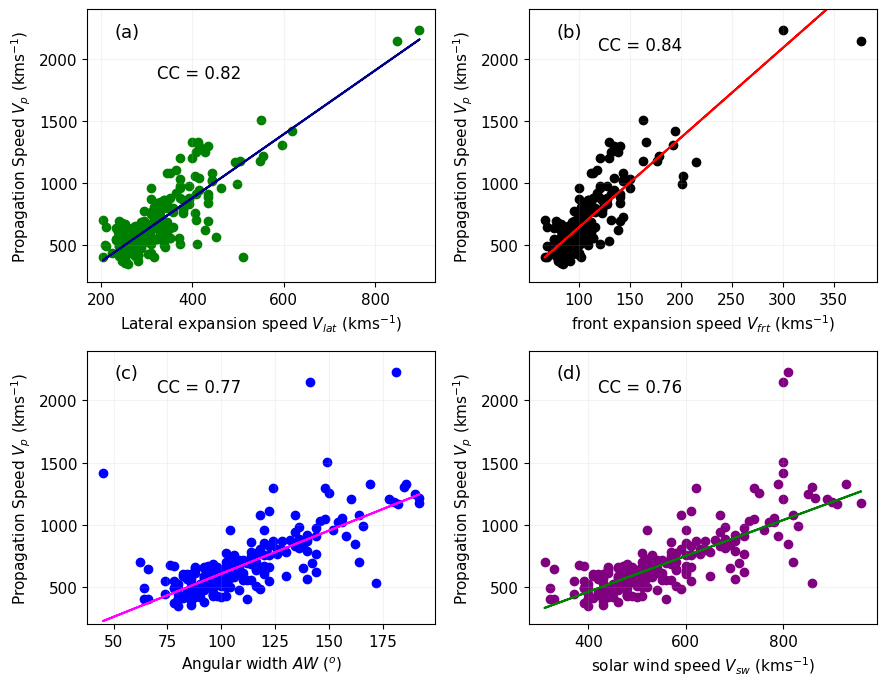

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate some sample data
X, y = df[['Vlat']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.figure(figsize = (9, 7))

plt.subplot(2,2,1)
plt.scatter(X, y, c='green')
plt.plot(X, y_pred, c='darkblue')
plt.xlabel('Lateral expansion speed $V_{lat}$ (kms$^{-1}$)')
plt.ylabel('Propagation Speed $V_{p}$ (kms$^{-1}$)')
plt.ylim(200, 2400)
# plt.legend(frameon=0)
plt.grid(True, alpha =0.15)
plt.annotate(f'CC = 0.82', xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(a)', xy=(0.08, 0.95), xycoords='axes fraction', fontsize=13, ha='left', va='top')



X, y = df[['Vfrt']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(2,2,2)
plt.scatter(X, y, c='black')
plt.plot(X, y_pred, c='red')
plt.xlabel('front expansion speed $V_{frt}$ (kms$^{-1}$)')
plt.ylabel('Propagation Speed $V_{p}$ (kms$^{-1}$)')
plt.ylim(200, 2400)
# plt.legend(frameon=0)
plt.grid(True, alpha =0.15)
plt.annotate(f'CC = 0.84', xy=(0.2, 0.9), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(b)', xy=(0.08, 0.95), xycoords='axes fraction', fontsize=13, ha='left', va='top')




X, y = df[['2aw']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(2,2,3)
plt.scatter(X, y, c='blue')
plt.plot(X, y_pred, c='magenta')
plt.xlabel('Angular width $AW$ ($^{o}$)')
plt.ylabel('Propagation Speed $V_{p}$ (kms$^{-1}$)')
plt.ylim(200, 2400)
# plt.legend(frameon=0)
plt.grid(True, alpha =0.15)
plt.annotate(f'CC = 0.77', xy=(0.2, 0.9), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(c)', xy=(0.08, 0.95), xycoords='axes fraction', fontsize=13, ha='left', va='top')




X, y = df[['Vsw']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(2,2,4)
plt.scatter(X, y, c='purple')
plt.plot(X, y_pred, c='green')
plt.xlabel('solar wind speed $V_{sw}$ (kms$^{-1}$)')
plt.ylabel('Propagation Speed $V_{p}$ (kms$^{-1}$)')
plt.ylim(200, 2400)
# plt.legend(frameon=0)
plt.grid(True, alpha =0.15)
plt.annotate(f'CC = 0.76', xy=(0.2, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(d)', xy=(0.08, 0.95), xycoords='axes fraction', fontsize=13, ha='left', va='top')

plt.tight_layout()
plt.show()
